### Calculating the relative XS width of the traps 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# load the topography data from a CSV file
data_folder = 'data' # folder containing the data
# list to store data from each CSV and the filenames
probe_topo = {}

# loop through all CSV files in the folder
for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_folder, filename) # full path to the CSV file
        df = pd.read_csv(file_path) # read the CSV file
        # use the filename without the extension as the key
        key = os.path.splitext(filename)[0]
        probe_topo[key] = df

# print the name of all the probe_topo keys
print(probe_topo.keys())

# fill in the water edges
water_edges = {
    'T1': (0.65, 1.4),
    'T2': (0.2, 1.7),
    'T3': (0.5, 1.6),
    'T4': (0.3, 1.5),
    'T5': (0.25, 1.3),
    'T6': (0.2, 1.27),
    'T7': (0.1, 1.1),
    'T8': (0.51, 1.9),
    }

dict_keys(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8'])


#### Resample topo
This is to have a higher resolution of data points for my calculations 

In [2]:
for key in probe_topo.keys():
    df = probe_topo[key]
    # extract X and elevation data
    x = df.iloc[:, 0].values
    elevation = df.iloc[:, 1].values
    # create new X array with values every 1 cm (0.01 meters)
    x_new = np.arange(x.min(), x.max(), 0.01)
    # interpolate elevation values for the new X array
    elevation_new = np.interp(x_new, x, elevation)
    # create a new DataFrame with the resampled X and interpolated elevation values
    df_resampled = pd.DataFrame({'Distance': x_new, 'Elevation': elevation_new})
    probe_topo[key] = df_resampled


Wetter perimeter calculations

Columns in T1: ['Distance', 'Elevation']
T1 - Wetted Perimeter: 0.7984999766763805 meters
T1 - Horizontal Wetted Perimeter: 0.7600000000000001 meters


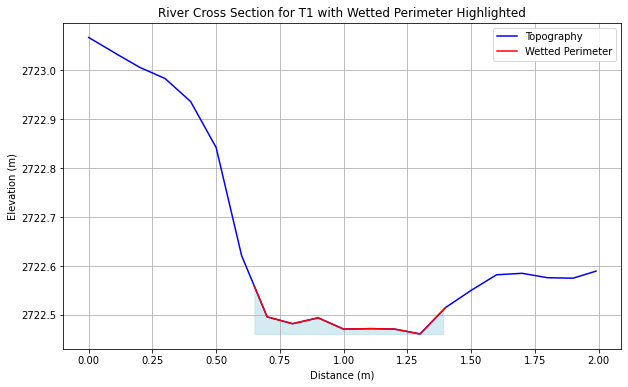

Columns in T2: ['Distance', 'Elevation']
T2 - Wetted Perimeter: 1.560532839356713 meters
T2 - Horizontal Wetted Perimeter: 1.52 meters


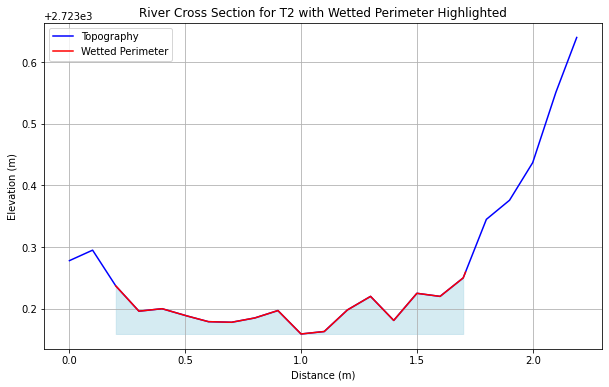

Columns in T3: ['Distance', 'Elevation']
T3 - Wetted Perimeter: 1.1901206531631159 meters
T3 - Horizontal Wetted Perimeter: 1.12 meters


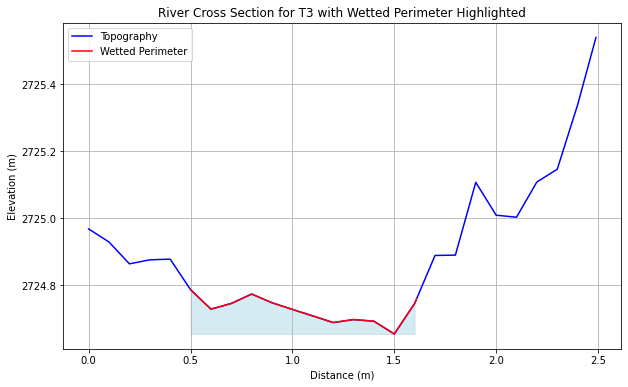

Columns in T4: ['Distance', 'Elevation']
T4 - Wetted Perimeter: 1.2758811248753148 meters
T4 - Horizontal Wetted Perimeter: 1.22 meters


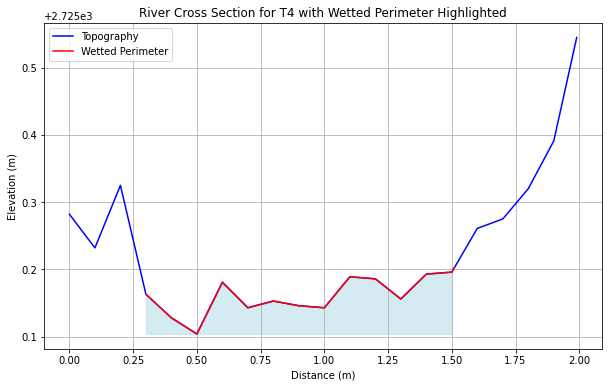

Columns in T5: ['Distance', 'Elevation']
T5 - Wetted Perimeter: 1.2460364562411235 meters
T5 - Horizontal Wetted Perimeter: 1.07 meters


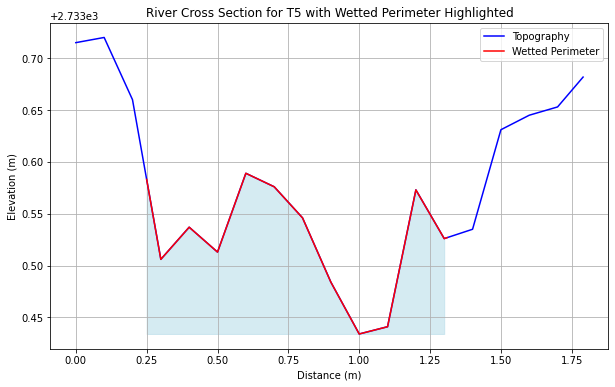

Columns in T6: ['Distance', 'Elevation']
T6 - Wetted Perimeter: 1.6692847677920117 meters
T6 - Horizontal Wetted Perimeter: 1.09 meters


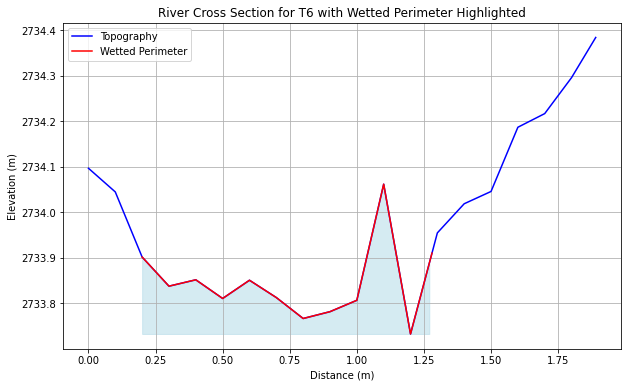

Columns in T7: ['Distance', 'Elevation']
T7 - Wetted Perimeter: 1.1466245743520542 meters
T7 - Horizontal Wetted Perimeter: 1.02 meters


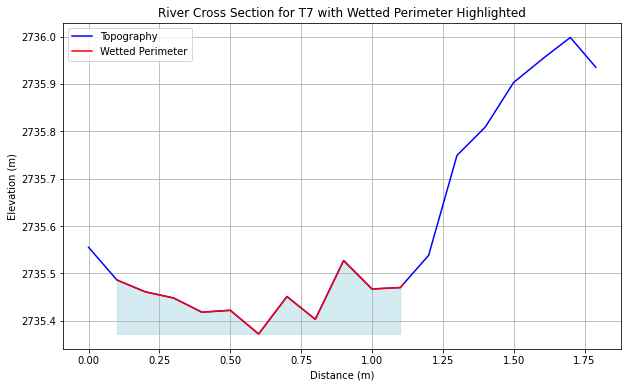

Columns in T8: ['Distance', 'Elevation']
T8 - Wetted Perimeter: 1.6551137031156786 meters
T8 - Horizontal Wetted Perimeter: 1.4000000000000001 meters


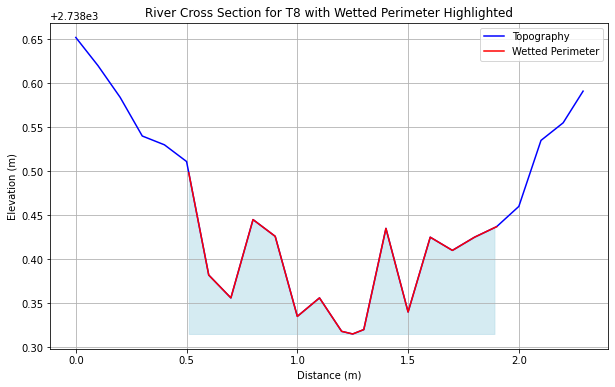

In [3]:
for key in probe_topo.keys():
    df = probe_topo[key]
    print(f"Columns in {key}: {df.columns.tolist()}")
    x = df['Distance'].values
    y = df['Elevation'].values
    
    # get the water edge points for the current key
    water_edge_start, water_edge_end = water_edges[key]
    
    # find the indices where the water edges are located
    start_index = np.searchsorted(x, water_edge_start, side='left')
    end_index = np.searchsorted(x, water_edge_end, side='right')

    # ensure indices are within bounds
    start_index = max(start_index - 1, 0)
    end_index = min(end_index, len(x) - 1)

    # calculate the wetted perimeter
    wetted_perimeter = 0
    wetted_x = []
    wetted_y = []

    for i in range(start_index, end_index):
        # check if the segment is within the water edge range
        if x[i] >= water_edge_start and x[i] <= water_edge_end:
            dx = x[i+1] - x[i]
            dy = y[i+1] - y[i]
            wetted_perimeter += np.sqrt(dx**2 + dy**2)
            wetted_x.extend([x[i], x[i+1]])
            wetted_y.extend([y[i], y[i+1]])

    # calculate the distance between the water edges
    distance = x[end_index] - x[start_index]

    print(f"{key} - Wetted Perimeter: {wetted_perimeter} meters")
    print(f"{key} - Horizontal Wetted Perimeter: {distance} meters")

    # plotting the cross section and wetted perimeter
    plt.figure(figsize=(10, 6))

    plt.plot(x, y, label='Topography', color='blue')
    plt.plot(wetted_x, wetted_y, label='Wetted Perimeter', color='red')
    plt.fill_between(x, y, y.min(), where=(x >= water_edge_start) & (x <= water_edge_end), color='lightblue', alpha=0.5)

    plt.xlabel('Distance (m)')
    plt.ylabel('Elevation (m)')
    plt.title(f'River Cross Section for {key} with Wetted Perimeter Highlighted')
    plt.legend()
    plt.grid(True)
    plt.show()